# Prevendo dempenho de alunos no ENEM uitlizando modelos de Regressao Linear

### Carregando as bibliotecas necessarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando os dados

In [2]:
df_enem = pd.read_csv("./DADOS/enem_eng.csv", sep=";")

In [3]:
df_enem.shape

(411175, 81)

In [4]:
df_enem.describe()

,NU_INSCRICAO,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,...,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,QTD_RECURSOS,RESULTADO
count,4.111750e+05,411169.000000,411175.000000,411175.000000,222307.000000,411175.000000,9.530200e+04,95302.000000,95302.000000,95302.000000,...,411175.000000,411175.000000,411175.000000,411175.000000,411175.000000,411175.000000,411175.000000,411175.000000,411175.000000,411175.000000
mean,1.900035e+11,21.167143,1.623790,2.466638,1.005447,0.155654,3.114589e+07,2.244528,1.029737,1.004480,...,1.104877,124.688758,127.733933,119.337508,126.207868,99.245869,597.213936,3.783557,0.012586,527.856018
std,1.486087e+06,6.994727,0.751033,3.772849,0.073606,0.362527,4.968740e+05,0.768415,0.169862,0.111042,...,0.677591,32.364600,43.910908,40.954206,38.796806,60.659416,192.931916,1.315436,0.163383,115.375276
min,1.900010e+11,10.000000,1.000000,0.000000,1.000000,0.000000,1.102298e+07,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.900022e+11,17.000000,1.000000,0.000000,1.000000,0.000000,3.103239e+07,2.000000,1.000000,1.000000,...,1.000000,120.000000,120.000000,100.000000,100.000000,60.000000,500.000000,3.000000,0.000000,467.475000
50%,1.900035e+11,19.000000,1.000000,1.000000,1.000000,0.000000,3.110900e+07,2.000000,1.000000,1.000000,...,1.000000,120.000000,120.000000,120.000000,120.000000,100.000000,600.000000,4.000000,0.000000,529.308333
75%,1.900046e+11,22.000000,2.000000,3.000000,1.000000,0.000000,3.119080e+07,2.000000,1.000000,1.000000,...,1.000000,140.000000,160.000000,140.000000,140.000000,140.000000,720.000000,4.000000,0.000000,602.391667
max,1.900061e+11,83.000000,4.000000,13.000000,2.000000,1.000000,5.300994e+07,4.000000,2.000000,4.000000,...,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,20.000000,8.000000,878.016667


In [5]:
df_enem.head()

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,Q023,Q024,Q025,ATENDIMENTOS_ESPECIALIZADOS,QTD_RECURSOS,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,RENDA_CLASSE,RENDA_ARBITRARIA,RESULTADO
0,190001237802,22.0,F,Solteiro,Branca,Brasileira,1,4,?,1.0,...,B,B,B,Nao,0,Não completou ES,Não completou ES,C,Até 3.992,655.725000
1,190001237804,27.0,M,Solteiro,Parda,Naturalizado,1,2,?,NaN,...,A,A,A,Nao,0,Não sabe,Não sabe,E,Até 1.497,469.041667
2,190001237805,22.0,F,Solteiro,Branca,Brasileira,1,5,?,1.0,...,A,B,B,Nao,0,Não completou ES,Completou EF,C,Até 3.992,596.625000
3,190001237806,23.0,F,Solteiro,Amarela,Brasileira,1,5,?,1.0,...,A,B,B,Nao,0,Não completou EF,Não completou EF,D,Até 1.497,519.483333
4,190001237809,20.0,M,Solteiro,Parda,Brasileira,1,2,?,1.0,...,A,B,B,Nao,0,Nunca estudou,Não completou ES,D,Até 1.497,681.975000


### Analise exploratoria

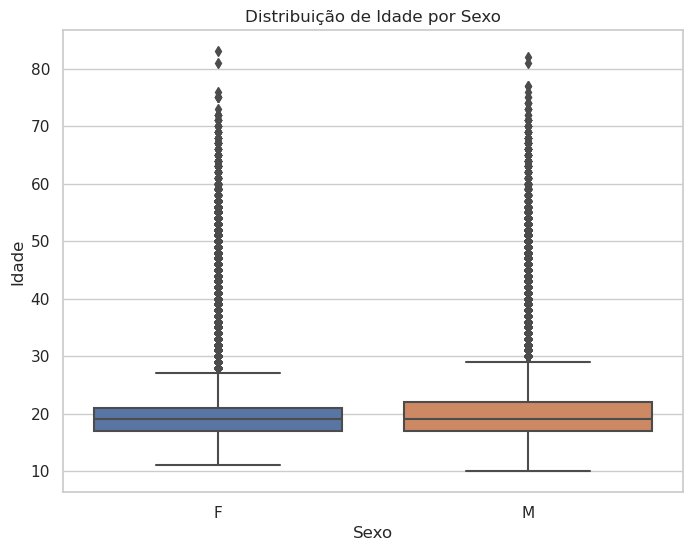

In [6]:
# Variavel idade por sexo
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x='TP_SEXO', y='NU_IDADE', data=df_enem)
plt.xlabel('Sexo')
plt.ylabel('Idade')
plt.title('Distribuição de Idade por Sexo')
plt.show()

In [7]:
# Ha participantes com mais de 80 anos, vamos analisar quantos e quais idades
df_enem[df_enem['NU_IDADE'] > 80]

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,Q023,Q024,Q025,ATENDIMENTOS_ESPECIALIZADOS,QTD_RECURSOS,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,RENDA_CLASSE,RENDA_ARBITRARIA,RESULTADO
158094,190003157675,81.0,M,Casado,Branca,Brasileira,1,13,?,NaN,...,B,D,B,Nao,0,Não completou EF,Não completou EF,A,Mais de 11.976,543.400000
351525,190005398898,81.0,F,Viuvo,Parda,Brasileira,1,6,?,NaN,...,B,B,B,Nao,0,Não completou EF,Não completou EF,D,Até 3.992,80.191667
366638,190005754685,83.0,F,Viuvo,Branca,Brasileira,2,0,Publica,NaN,...,A,B,A,Nao,0,Não completou EF,Não completou EF,D,Até 1.497,401.250000
402374,190005762159,82.0,M,Casado,Parda,Brasileira,1,13,?,NaN,...,B,B,B,Nao,0,Não sabe,Não sabe,B,Até 11.976,494.391667


In [8]:
#Sao 4 registros, manteremos os mesmos pois apesar de incomum, pode acontecer

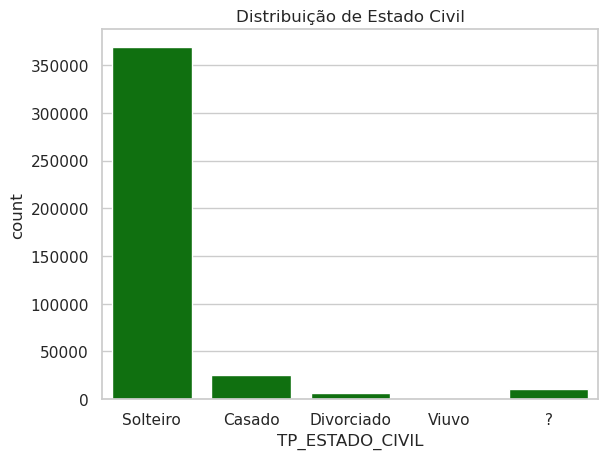

In [9]:
#Histograma do estado civil
sns.countplot(x=df_enem['TP_ESTADO_CIVIL'], color='green', orient='v')
plt.title('Distribuição de Estado Civil')
plt.show()

In [10]:
# Conforme esperado, a grande maioria dos participanetes sao solteiros
#Verificar a media do resultado por estado civil
df_enem.groupby(['TP_ESTADO_CIVIL'])['RESULTADO'].mean()

TP_ESTADO_CIVIL
?             513.769930
Casado        490.324692
Divorciado    491.101433
Solteiro      531.486985
Viuvo         461.321819
Name: RESULTADO, dtype: float64

In [11]:
# As medias dos resultados sao similares

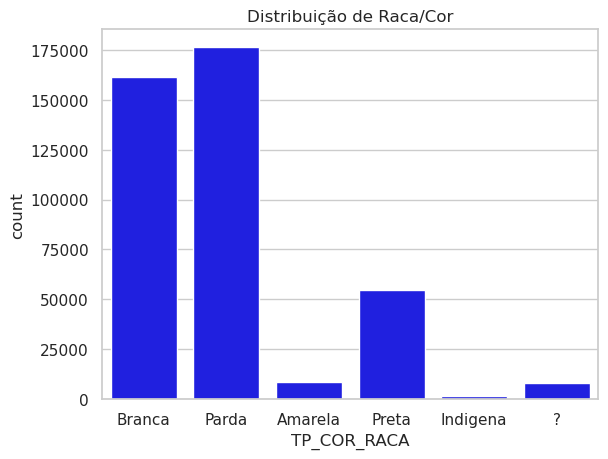

In [12]:
#Verificar os participantes por raca
#Histograma da contagem por raca
sns.countplot(x=df_enem['TP_COR_RACA'], color='blue', orient='v')
plt.title('Distribuição de Raca/Cor')
plt.show()

In [13]:
# A Maioria das pessoas se consideram brancas ou pardas, somanda as pessoas que se consideram pretas, temos 56% de pretas e pardas
df_enem[(df_enem['TP_COR_RACA'] == 'Preta') | (df_enem['TP_COR_RACA'] == 'Parda')].shape[0] / df_enem.shape[0] * 100

56.23104517541193

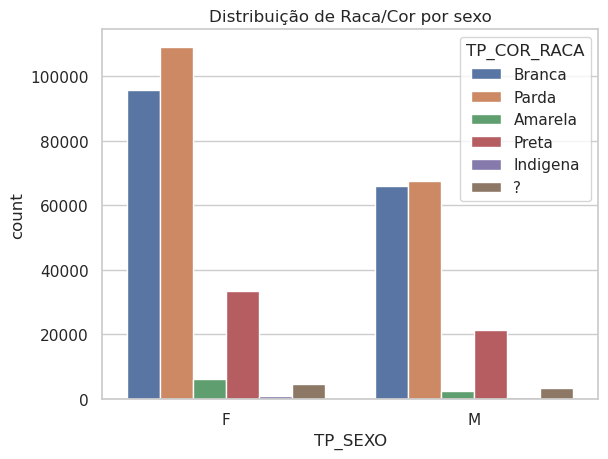

In [14]:
# Verificar a raca/cor por sexo
sns.countplot(data=df_enem, x='TP_SEXO', hue='TP_COR_RACA')
plt.title('Distribuição de Raca/Cor por sexo')
plt.show()

In [15]:
# A quantidade de mulheres que realizaram o exame eh maior que a de homens e a cor possui distribuicao similar entre os sexos

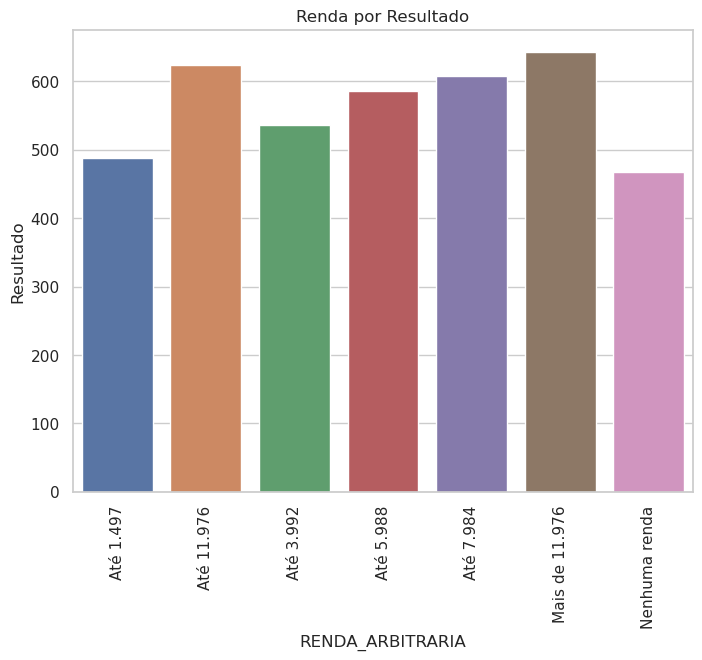

  RENDA_ARBITRARIA   RESULTADO
0        Até 1.497  488.591501
1       Até 11.976  623.476975
2        Até 3.992  535.676340
3        Até 5.988  586.388445
4        Até 7.984  607.343738
5   Mais de 11.976  643.161150
6    Nenhuma renda  466.826582


In [18]:
#Verificar a media do resultado considerando a renda
df_renda = df_enem.groupby(['RENDA_ARBITRARIA'])['RESULTADO'].mean().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df_renda['RENDA_ARBITRARIA'], y=df_renda['RESULTADO'])
ax.set(ylabel='Resultado', title='Renda por Resultado')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()
print(df_renda)

In [19]:
# Podemos observar que nesta segmentacao os grupos de menor renda tiveram o pior desempenho 
# Os grupos com salario acima de 6 mil tiveram resultados similares
# 
# Observando agora a segmentacao de resultado por classe conforme FGV

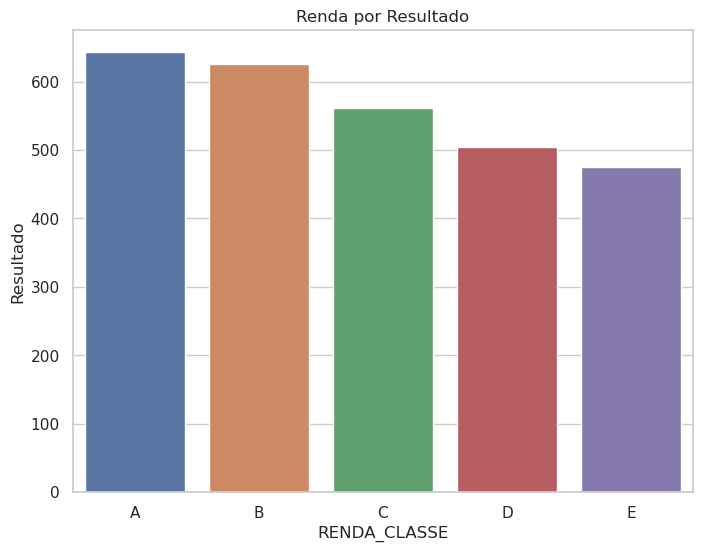

  RENDA_CLASSE   RESULTADO
0            A  643.161150
1            B  625.853992
2            C  561.058523
3            D  504.030480
4            E  475.119459


In [20]:
#Verificar a media do resultado considerando a renda segmentada pela regra da FGV
df_renda = df_enem.groupby(['RENDA_CLASSE'])['RESULTADO'].mean().reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df_renda['RENDA_CLASSE'], y=df_renda['RESULTADO'])
ax.set(ylabel='Resultado', title='Renda por Resultado')
plt.show()
print(df_renda)

In [21]:
# Na segmentacao realizada pelas classes sociais da FGV, segundo o grafico, mostrou que conforme maior a classe social melhor o desempenho na prova

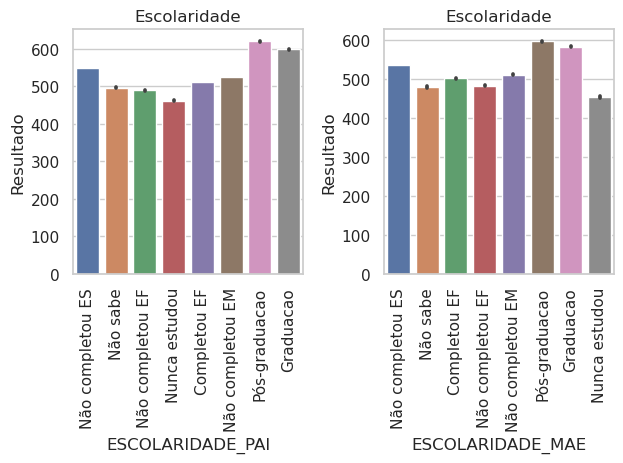

In [22]:
#Varificar o rendimento da Prova de acordo com a escolaridade dos pais
escolaridade_pais = ['ESCOLARIDADE_PAI', 'ESCOLARIDADE_MAE']
for i in range(0, len(escolaridade_pais)):
    plt.subplot(1, len(escolaridade_pais), i + 1)
    ax = sns.barplot(x=df_enem[escolaridade_pais[i]], y=df_enem['RESULTADO'])
    ax.set(ylabel='Resultado', title='Escolaridade')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.tight_layout()

In [23]:
#Conforme os graficos, existe uma tendencia em conforme os pais possuem grais mais altos de escolaridade, o desempenho aumenta

In [24]:
# Analisar desempenho em cada area avaliada de acordo com a escolaridade, raca/cor, classe social

In [25]:
entradas=['ESCOLARIDADE_PAI', 'ESCOLARIDADE_MAE','TP_COR_RACA','RENDA_CLASSE']

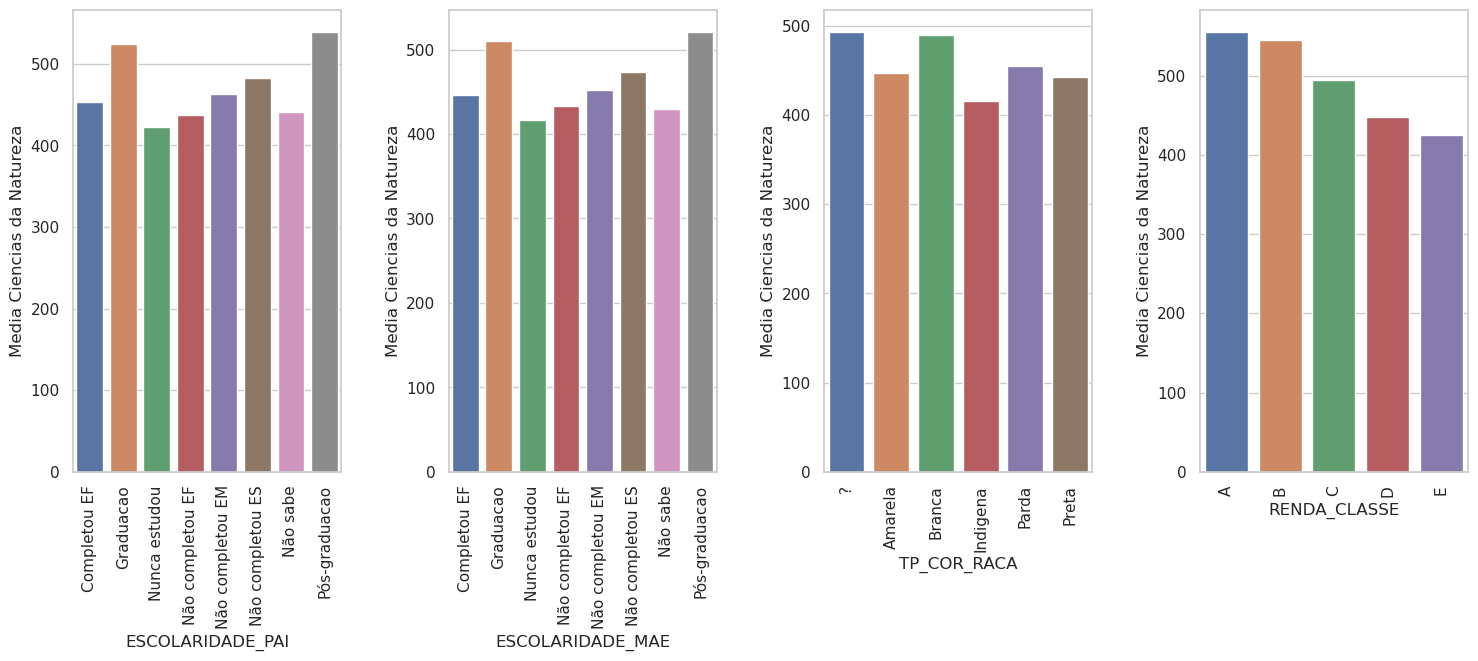

In [26]:
#Media das notas Ciencias da Natureza por escolaridade, raca/cor, classe social
fig, axs = plt.subplots(1, 4 , figsize=(18, 6))
for i in range(4):
    df_temp = df_enem.groupby([entradas[i]])['NU_NOTA_CN'].mean().reset_index()
    sns.barplot(x=df_temp[entradas[i]], y=df_temp['NU_NOTA_CN'], ax=axs[i])
    axs[i].set_ylabel('Media Ciencias da Natureza')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [27]:
# Seguindo o mesmo padrao da Media das provas, conforme aumenta a escolaridade dos pais ou a classe social, maior o resultado da prova de Ciencias da Natureza

# Considerando cor/raca, os indigenas (menor numero de respondentes) tiveram menor desempenho se comparado com os demais. Etnias preta parda e amarela tiveram desempenho similares. Os nao informado tiveram desempenho similar a etnia branca (maior numero de respondentes)

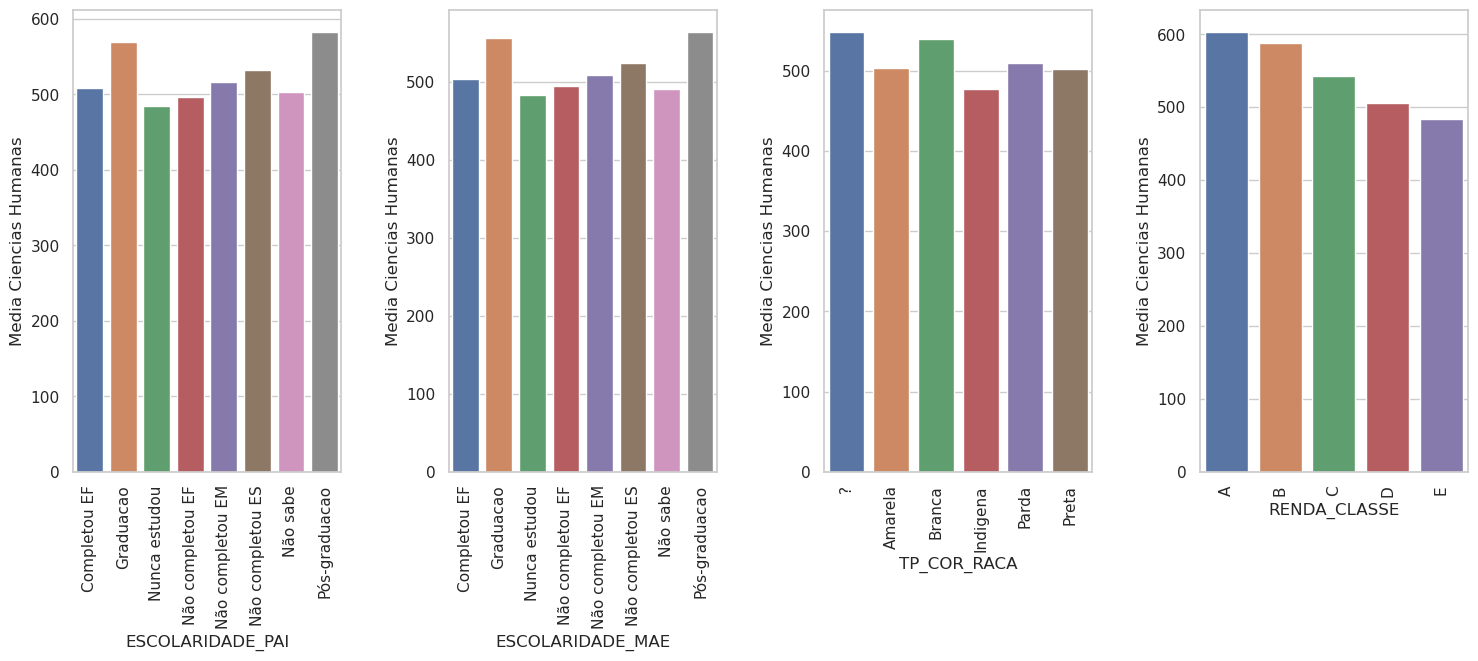

In [28]:
#Media das notas Ciencias Humanas por escolaridade, raca/cor, classe social
fig, axs = plt.subplots(1, 4 , figsize=(18, 6))
for i in range(4):
    df_temp = df_enem.groupby([entradas[i]])['NU_NOTA_CH'].mean().reset_index()
    sns.barplot(x=df_temp[entradas[i]], y=df_temp['NU_NOTA_CH'], ax=axs[i])
    axs[i].set_ylabel('Media Ciencias Humanas')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [29]:
# O resultado da prova de Ciencias Humanas seguiu o mesmo padrao da prova de Ciencias da Natureza

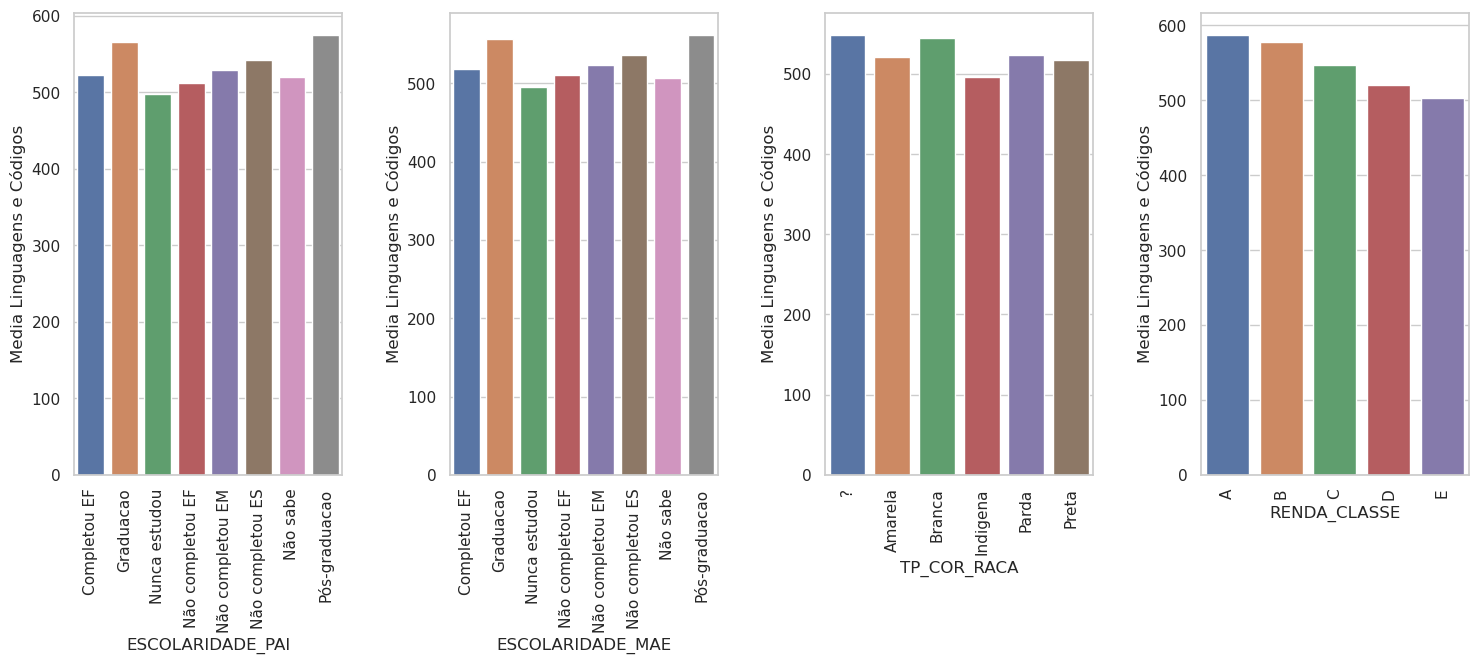

In [30]:
#Media das notas da prova Linguagens e Códigos por escolaridade, raca/cor, classe social
fig, axs = plt.subplots(1, 4 , figsize=(18, 6))
for i in range(4):
    df_temp = df_enem.groupby([entradas[i]])['NU_NOTA_LC'].mean().reset_index()
    sns.barplot(x=df_temp[entradas[i]], y=df_temp['NU_NOTA_LC'], ax=axs[i])
    axs[i].set_ylabel('Media Linguagens e Códigos')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [31]:
# O resultado da prova de Ciencias Humanas seguiu o mesmo padrao da prova de Ciencias da Natureza e Ciencias Humanas
# apesar disso, houve uma menor variacao na dependencia da escolaridade dos pais

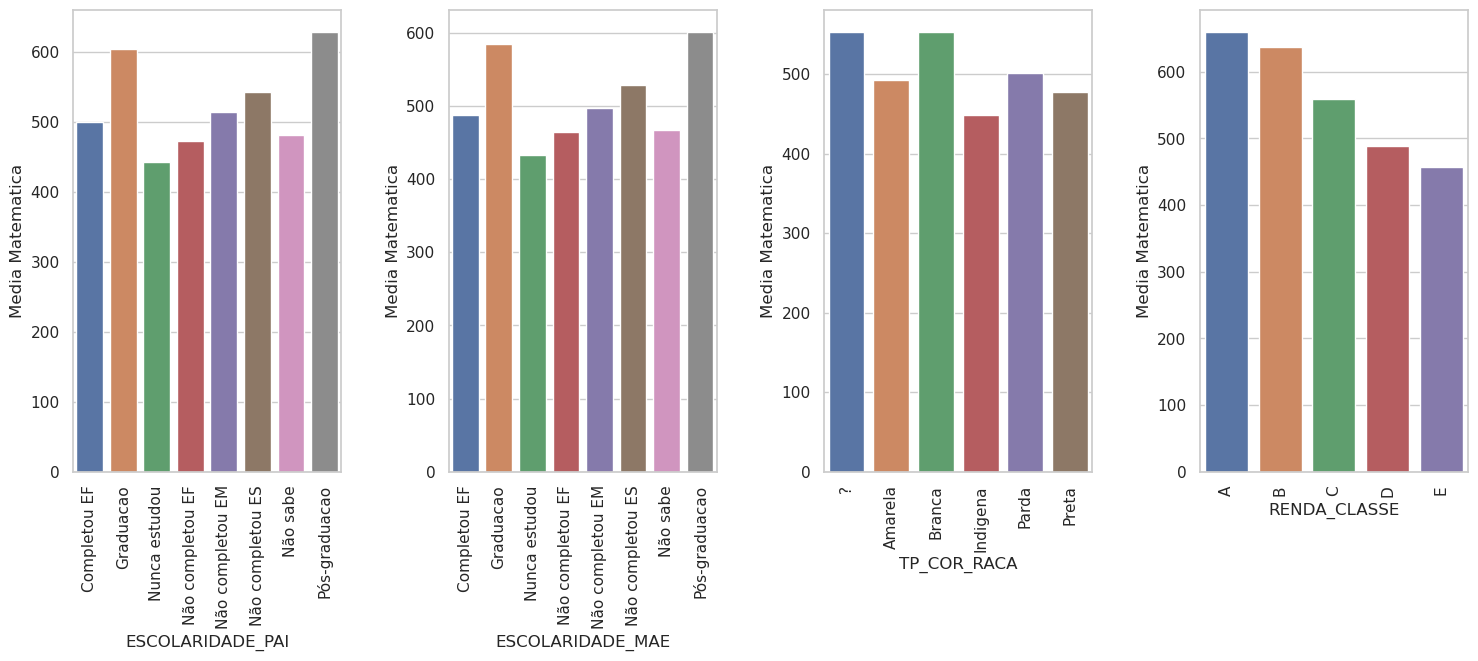

In [32]:
#Media das notas da prova de Matemática por escolaridade, raca/cor, classe social
fig, axs = plt.subplots(1, 4 , figsize=(18, 6))
for i in range(4):
    df_temp = df_enem.groupby([entradas[i]])['NU_NOTA_MT'].mean().reset_index()
    sns.barplot(x=df_temp[entradas[i]], y=df_temp['NU_NOTA_MT'], ax=axs[i])
    axs[i].set_ylabel('Media Matematica')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [33]:
# O resultado da prova de matematica seguiu o mesmo padrao da prova de Ciencias da Natureza, Ciencias Humanas e Linguagens e codigos, entretanto, a disparidade quando consideramos a escolaridade dos pais aumentou conforme maior a escolaridade


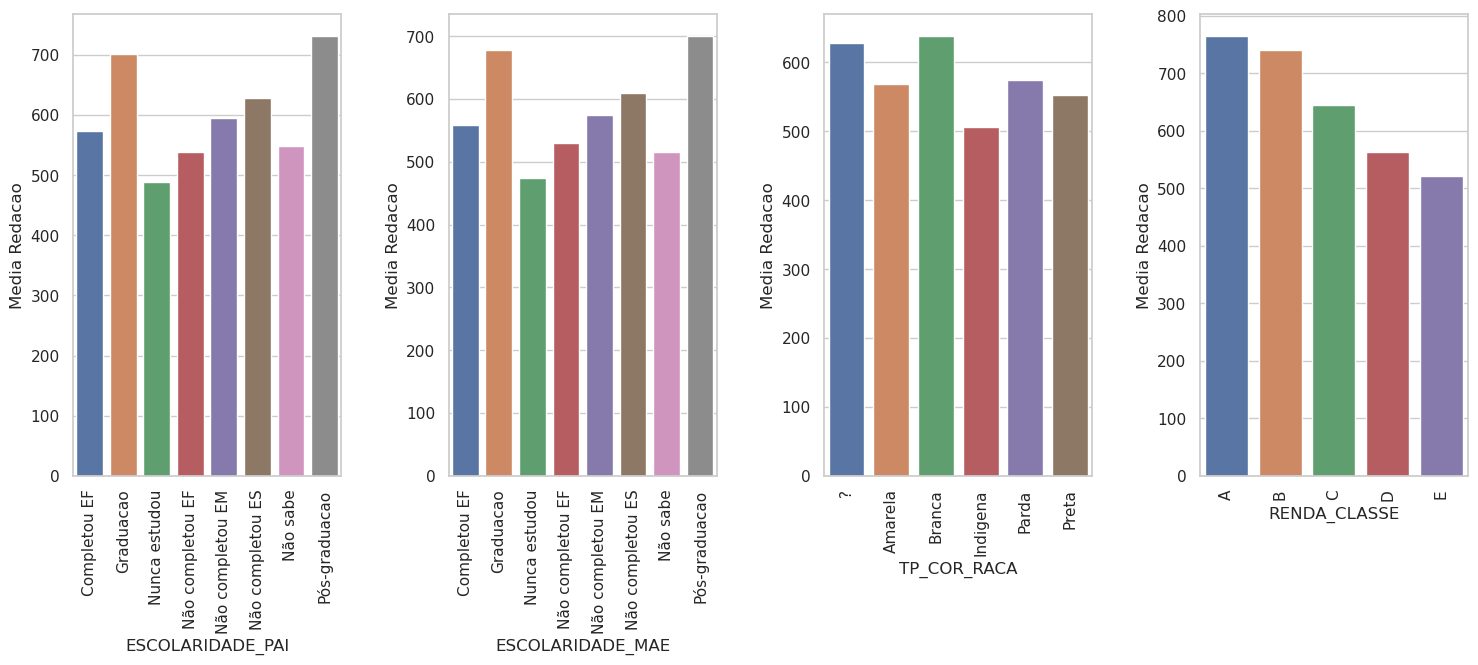

In [34]:
#Media das notas da prova de redacao por escolaridade, raca/cor, classe social
fig, axs = plt.subplots(1, 4 , figsize=(18, 6))
for i in range(4):
    df_temp = df_enem.groupby([entradas[i]])['NU_NOTA_REDACAO'].mean().reset_index()
    sns.barplot(x=df_temp[entradas[i]], y=df_temp['NU_NOTA_REDACAO'], ax=axs[i])
    axs[i].set_ylabel('Media Redacao')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [35]:
# O resultado da prova de redacao seguiu o mesmo padrao da prova de matematica

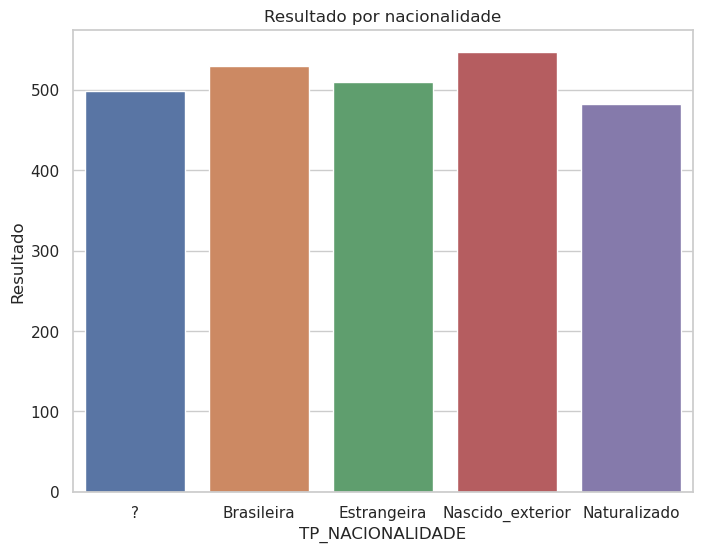

   TP_NACIONALIDADE   RESULTADO
0                 ?  498.719241
1        Brasileira  529.111972
2       Estrangeira  509.172019
3  Nascido_exterior  547.291575
4      Naturalizado  482.190082


In [36]:
#Verificar o desempenho da media final de acordo com a nacionalidade
df_nacionalidade = df_enem.groupby(['TP_NACIONALIDADE'])['RESULTADO'].mean().reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df_nacionalidade['TP_NACIONALIDADE'], y=df_nacionalidade['RESULTADO'])
ax.set(ylabel='Resultado', title='Resultado por nacionalidade')
plt.show()
print(df_nacionalidade)

In [37]:
# os nascidos no exterior tiveram na media um desempenho na media maior que os demais, menos nao tendo uma variacao tao alta entre as nacionalidades 

#Os naturalizados foram os que tiveram menor desempenho geral

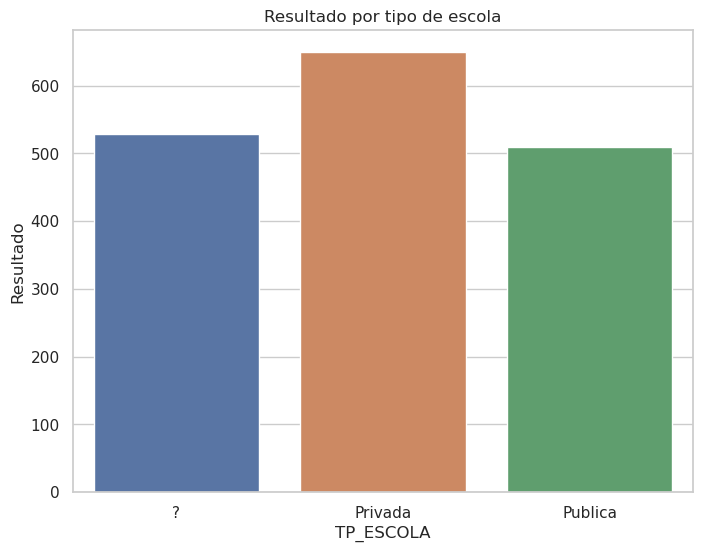

  TP_ESCOLA   RESULTADO
0         ?  527.948735
1   Privada  649.373842
2   Publica  509.209807


In [38]:
#Verificar desempenho da media final de acordo com a tipo de escola
#Verificar o desempenho da media final de acordo com a nacionalidade
df_escola = df_enem.groupby(['TP_ESCOLA'])['RESULTADO'].mean().reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df_escola['TP_ESCOLA'], y=df_escola['RESULTADO'])
ax.set(ylabel='Resultado', title='Resultado por tipo de escola')
plt.show()
print(df_escola)


In [39]:
# Conforme pode se observar, estudantes de escola privada tiveram resultados superiores a estudantes de escolas publicas ou os que nao informaram

### Analisando a correlacao entre as variaveis

In [40]:
#Considerar as seguintes variaveis para realizar a correlacao com a media final
# Notas:
# NU_NOTA_CN
# NU_NOTA_CH
# NU_NOTA_LC
# NU_NOTA_MT
# NU_NOTA_REDACAO
# E NU_IDADE
colunas= ['NU_IDADE','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','RESULTADO']
correlacao  = df_enem[colunas].corr()
correlacao

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,RESULTADO
NU_IDADE,1.000000,-0.048263,-0.002486,-0.056128,-0.107237,-0.164876,-0.126167
NU_NOTA_CN,-0.048263,1.000000,0.497150,0.465319,0.862407,0.452467,0.855087
NU_NOTA_CH,-0.002486,0.497150,1.000000,0.755321,0.519414,0.567434,0.692292
NU_NOTA_LC,-0.056128,0.465319,0.755321,1.000000,0.488439,0.556683,0.674561
NU_NOTA_MT,-0.107237,0.862407,0.519414,0.488439,1.000000,0.492564,0.884822
NU_NOTA_REDACAO,-0.164876,0.452467,0.567434,0.556683,0.492564,1.000000,0.807124
RESULTADO,-0.126167,0.855087,0.692292,0.674561,0.884822,0.807124,1.000000


<Axes: >

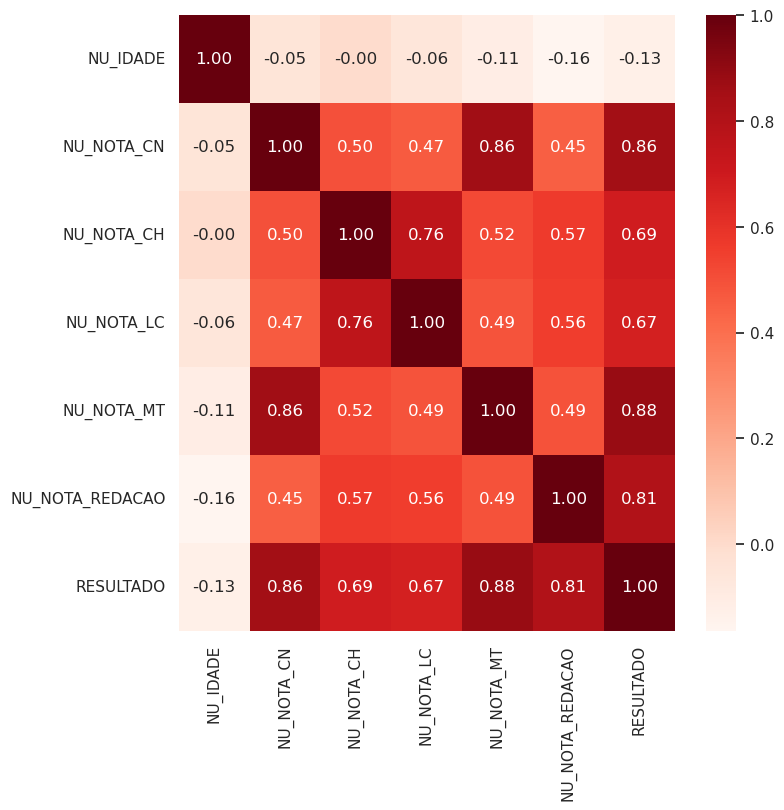

In [41]:
# Mapa de calor
plt.figure(figsize = (8, 8))
sns.heatmap(correlacao, cmap = 'Reds', annot = True, fmt = '.2f')

In [42]:
# Todas as notas possuem uma correlacao positiva com o resultado final, sendo as de Ciencias Humanas e Liguagens e codigos as de menor correlacao positiva com o resultado final

#A idade apresentou correlacao negativa, mas sem grande correlacao